In [6]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from matplotlib.ticker import MultipleLocator
from sklearn.decomposition import PCA

In [5]:
def load_data(name):
    files = glob.glob('Day 3/Whiskey/'+name+'*.txt')
    data = np.loadtxt(files[0], dtype=np.str, skiprows=14)
    data = np.char.replace(data, ',', '.').astype(np.float64)
    for f in files[1:]:
        temp_data = np.loadtxt(f, dtype=np.str, skiprows=14)
        temp_data = np.char.replace(temp_data, ',', '.').astype(np.float64)
        data[:,1] += temp_data[:,1]
    data[:,1] /= len(files)
    return data
def to_integrals(data):
    return (np.trapz(data[:300,1]),np.trapz(data[300:500,1]),np.trapz(data[1000:,1]))

In [3]:
whiskeys = [
    'Aberlour 12',
    'Glenfiddich 15',
    'Macallan',
    'Talisker Dist',
    'Black label',
    'Cragganmore',
    'Dewars 15',
    'Glenfiddich 12',
    'Glenlivet 12',
    'Lakes',
    'Laphroaig',
    'Muirheads',
    'Talisker Skye',
    'Famous Grouse',
    'WhiskeyDirect',
    'Sirup solution'
]

In [30]:
data = np.zeros((len(whiskeys), 1000))
for i in range(len(whiskeys)):
    data[i]= load_data(whiskeys[i])[:1000,1]

In [46]:
data

array([[-0.236 , -0.236 , -0.236 , ...,  0.086 ,  0.086 ,  0.086 ],
       [ 0.    ,  0.    ,  0.    , ...,  0.09  ,  0.098 ,  0.092 ],
       [-0.365 , -0.365 , -0.365 , ...,  0.0675,  0.0675,  0.0675],
       ...,
       [-0.148 , -0.148 , -0.148 , ...,  0.06  ,  0.06  ,  0.062 ],
       [-0.285 , -0.285 , -0.285 , ...,  0.1   ,  0.1   ,  0.1   ],
       [-0.464 , -0.464 , -0.464 , ...,  0.034 ,  0.03  ,  0.034 ]])

In [41]:
pca = PCA(2)

In [45]:
transformed = pca.fit_transform(data)
transformed

array([[-5.72461189,  1.09328046],
       [-4.19356323,  0.47222272],
       [-5.24156729,  0.43235455],
       [-3.4564591 , -0.2902357 ],
       [-0.2712623 , -0.21708525],
       [-3.5187358 ,  0.25308507],
       [ 1.31450416, -0.51030633],
       [ 0.7651231 , -1.13859311],
       [ 1.69314659, -0.90534176],
       [-2.74656232, -0.87797194],
       [ 0.80761861, -0.32784034],
       [ 2.12284166,  0.57079648],
       [ 1.21133328, -0.08580629],
       [ 4.97039436,  0.34752046],
       [ 5.10426123,  0.02639794],
       [ 7.16353896,  1.15752304]])

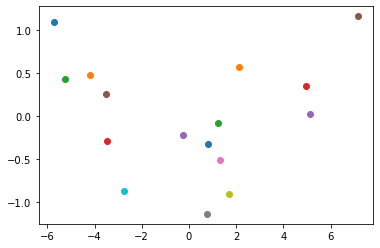

In [49]:
for t in transformed:
    plt.scatter(t[0], t[1])